# Financial Inclusion in East Africa (Kenya, Rwanda, Tanzania, and Uganda)

## 1. Defining the Question

### a) Specifying the Data Analytic Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

1. Succesfully predicting which individuals are most likely to have or use a bank account.
2. Determining the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

To solve the problem statement, we will do the following analysis:
1. Performs univariate analysis by calculating and interpreting measures of central tendency (mode, median, mean). Select an appropriate measure of dispersion and correctly calculate and interpret the statistic i.e. range, the interquartile range, the standard deviation, variance, skewness, and kurtosis. Create and interpret a histogram, a bar chart, a box plot, and a frequency table to analyse variables where necessary. Provide recommendations for effectively performing univariate analysis while working on the current problem.
2. Performs bivariate analysis by creating visualizations i.e. scatter plots, line charts to determine the relationship between variables, by describing the relationship between two quantitative variables, and computing and interpreting the Pearson correlation coefficient. Provide recommendations for effectively performing bivariate analysis while working on the current problem.
3. Performs multivariate analysis by finding relationships between variables using multiple regression analysis and applying reduction techniques to the analysis. Provide recommendations for effectively performing multivariate analysis while working on the current problem.

### e) Data Relevance

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

1. FinAccess Kenya 2018. [https://fsdkenya.org/publication/finaccess2019/ ]
2. Finscope Rwanda 2016. [http://www.statistics.gov.rw/publication/finscope-rwanda-2016 ]
3. Finscope Tanzania 2017. [http://www.fsdt.or.tz/finscope/ ]
4. Finscope Uganda 2018. [http://fsduganda.or.ug/finscope-2018-survey-report/ ]

Dataset Files:

1. Variable Definitions: http://bit.ly/VariableDefinitions 
2. Dataset: http://bit.ly/FinancialDataset 

## 2. Reading the Data

In [97]:
# Importing Libraries
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp

#Installing researchpy
!pip install -q researchpy

# Importing researchpy
import researchpy as rp

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

#Importing stats
from scipy import stats

# Loading the Data from the source i.e. csv
url = "http://bit.ly/FinancialDataset"
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [7]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


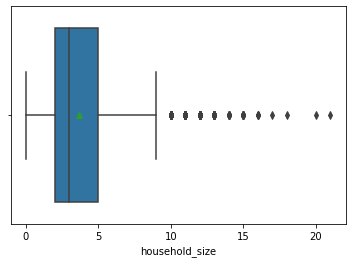

In [38]:
# Checking for Outliers in household_size
sns.boxplot(df.household_size, showmeans=True)

In [41]:
# Confirming the dataset
df.household_size.unique()
# will not drop the dataset as it seems accurate though the figures above ten are recorded as outliers.
# In Africa families, it's possible to have family households above 10. 

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


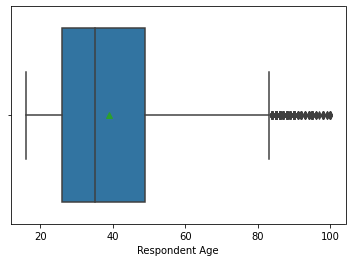

In [42]:
# Checking for Outliers in Respondent Age
sns.boxplot(df['Respondent Age'], showmeans=True)

In [43]:
# Confirming the dataset
df['Respondent Age'].unique()
# will not drop the dataset as it seems accurate though the figures above 80 are recorded as outliers.
# Ages between 80-100 are humanly possible to live in.

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [44]:
# Identifying the Missing Data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [45]:
# Dealing with the Missing Data
# Dropping the Missing Data
df =df.dropna(axis=0,how='any')
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [46]:
# Making column Names uniform
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns 

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [56]:
# Checking for Anomalies
print(df.level_of_educuation.unique())
# Dropping the '6' in education level
df.drop(df[df['level_of_educuation'] == '6'].index, inplace = True)
print(df.level_of_educuation.unique())

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
# Previewing the cleaned dataset
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 6. Exploratory Analysis

### Univariet Analysis

####Categorical Variables

Frequency Tables

Rwanda      8666
Tanzania    6497
Kenya       6064
Uganda      2089
Name: country, dtype: int64


Text(0.5, 1.0, 'Number of Observations Per Country')

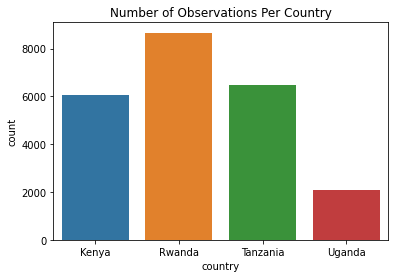

In [110]:
# Creating a frequency table: Number of observations per country
df1 = df.country.value_counts()
print(df1)
ax = sns.countplot(x="country",data=df)
plt.title("Number of Observations Per Country")

country   has_a_bank_account
Kenya     No                    4544
          Yes                   1520
Rwanda    No                    7673
          Yes                    993
Tanzania  No                    5899
          Yes                    598
Uganda    No                    1908
          Yes                    181
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per Country')

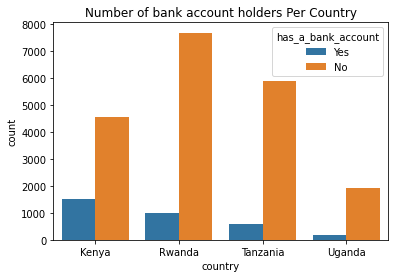

In [59]:
# Creating a frequency table: Number of bank account holders
df1 = df['has_a_bank_account'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per Country")

country   type_of_location
Kenya     Rural               3540
          Urban               2524
Rwanda    Rural               7430
          Urban               1236
Tanzania  Urban               4722
          Rural               1775
Uganda    Rural               1503
          Urban                586
Name: type_of_location, dtype: int64


Text(0.5, 1.0, 'Number of Observations Per Type of Location')

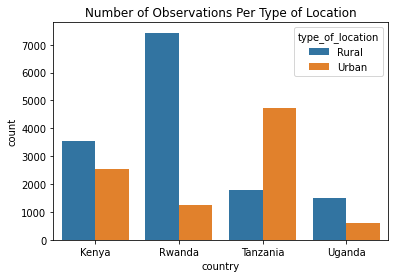

In [60]:
# Creating a frequency table: Number of Observations Per Type of Location
df1 = df['type_of_location'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="type_of_location")
plt.title("Number of Observations Per Type of Location")

country   cell_phone_access
Kenya     Yes                  4781
          No                   1283
Rwanda    Yes                  7198
          No                   1468
Tanzania  Yes                  3885
          No                   2612
Uganda    Yes                  1454
          No                    635
Name: cell_phone_access, dtype: int64


Text(0.5, 1.0, 'Cell Phone Access Per Country')

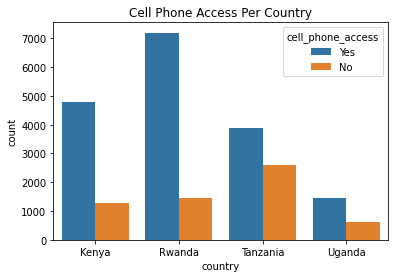

In [61]:
# Creating a frequency table: Cell Phone Access Per Country
df1 = df['cell_phone_access'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="cell_phone_access")
plt.title("Cell Phone Access Per Country")

country   gender_of_respondent
Kenya     Female                  3480
          Male                    2584
Rwanda    Female                  5160
          Male                    3506
Tanzania  Female                  3731
          Male                    2766
Uganda    Female                  1378
          Male                     711
Name: gender_of_respondent, dtype: int64


Text(0.5, 1.0, 'Gender Per Country')

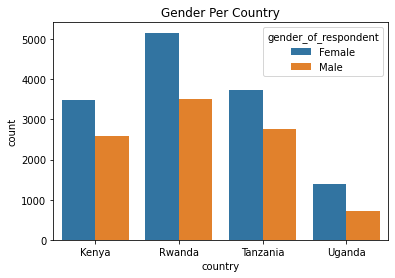

In [62]:
# Creating a frequency table: Gender Per Country
df1 = df['gender_of_respondent'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="gender_of_respondent")
plt.title("Gender Per Country")

country   level_of_educuation            
Kenya     Primary education                  2596
          Secondary education                1785
          No formal education                 941
          Vocational/Specialised training     442
          Tertiary education                  292
          Other/Dont know/RTA                   8
Rwanda    Primary education                  4809
          No formal education                2105
          Secondary education                1485
          Tertiary education                  176
          Vocational/Specialised training      91
Tanzania  Primary education                  4158
          No formal education                1102
          Tertiary education                  644
          Secondary education                 424
          Vocational/Specialised training     169
Uganda    Primary education                  1126
          Secondary education                 513
          No formal education                 319
        

Text(0.5, 1.0, 'Level of Education Per Country')

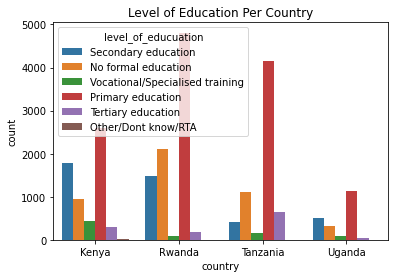

In [90]:
# Creating a frequency table: Gender Per Country
df1 = df['level_of_educuation'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="level_of_educuation")
plt.title("Level of Education Per Country")

Histograms

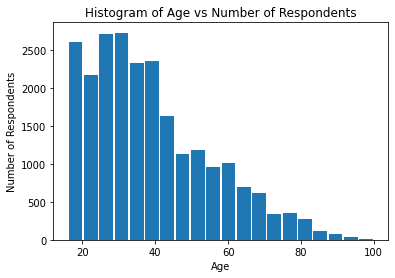

In [72]:
# Histogram representation of Observations Ages
plt.hist(df.respondent_age,bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Age vs Number of Respondents')
plt.show()

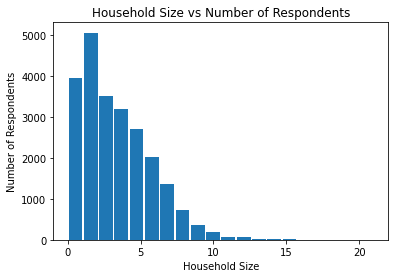

In [74]:
# Histogram representation of Number of Households Size
plt.hist(df.household_size,bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Number of Respondents')
plt.title('Household Size vs Number of Respondents')
plt.show()

#### Numerical Variables

 Measures of Central Tendency

In [78]:
# Finding the mean
print('Mean')
print(df[['household_size','respondent_age']].mean())

# Finding the median
print('Median')
print(df[['household_size','respondent_age']].median())

# Finding the mode
print('Mode')
print(df[['household_size','respondent_age']].mode())

Mean
household_size     3.688497
respondent_age    38.791988
dtype: float64
Median
household_size     3.0
respondent_age    35.0
dtype: float64
Mode
   household_size  respondent_age
0             2.0            30.0


Measures of Dispersion/Variability/Spread

In [89]:
# Finding the Standard Deviation 
print('Standard Deviation')
print(df[['household_size','respondent_age']].std())

# Finding the Variance
print('Variance')
print(df[['household_size','respondent_age']].var())

# Finding the Range
print('Household Size Range')
min = df.household_size.min()
max = df.household_size.max()
print(max-min)
print('Respondednt Age Range')
min1 = df.respondent_age.min()
max1 = df.respondent_age.max()
print(max1-min1)

# Finding the Range Quantile
print('Quantile')
print(df[['household_size','respondent_age']].quantile([0.25,0.5,0.75]))

# Finding the Skew
print('Skew')
print(df[['household_size','respondent_age']].skew())

#Finding Kurtosis
print('Kurtosis')
print(df[['household_size','respondent_age']].kurt())

Standard Deviation
household_size     2.280751
respondent_age    16.510509
dtype: float64
Variance
household_size      5.201825
respondent_age    272.596918
dtype: float64
Household Size Range
21.0
Respondednt Age Range
84.0
Quantile
      household_size  respondent_age
0.25             2.0            26.0
0.50             3.0            35.0
0.75             5.0            49.0
Skew
household_size    0.973724
respondent_age    0.841323
dtype: float64
Kurtosis
household_size    1.153040
respondent_age    0.101405
dtype: float64


In [88]:
#Displaying the summary statistics of the dataframe
df[['household_size','respondent_age']].describe()

,household_size,respondent_age
count,23316.000000,23316.000000
mean,3.688497,38.791988
std,2.280751,16.510509
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


####Analysis Reccomendations

1. In all the four countries i.e Kenya, Uganda, Rwanda and Tanzania, the number of those who dont have a bank account is much higher than those with bank accounts. 
2. In Kenya, Uganda and Rwanda, the majority of people lives in Rural whereas in Tanzania, the majority of people lives in Urban.
3. In all the four countries i.e Kenya, Uganda, Rwanda and Tanzania, the female population is much higher compared to male population
4. In all the four countries i.e Kenya, Uganda, Rwanda and Tanzania, the number of cellphone holders are higher than those who don't have cellphones.
5. In all the four countries i.e Kenya, Uganda, Rwanda and Tanzania, the highest level of education of the majority of the population is Primary Education
6. The average household size is 3.688497 and respondent age is 38.791988

###Bivariet Analysis

####Numerical Variables

Scatter Plots

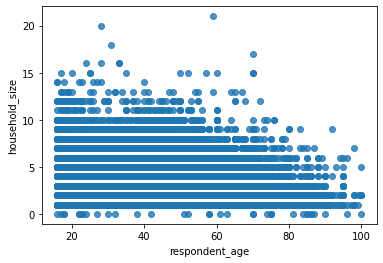

In [92]:
sns.regplot(x = df.respondent_age, y = df.household_size, fit_reg=False)
# there is no relationship between respondent age and household size

Z-test

In [104]:
# Calculating the z-test
print('Respondent Age')
print(stats.zscore(df.respondent_age))
print('household_size')
print(stats.zscore(df.household_size))

Respondent Age
[-0.89593272  1.89023127 -0.77479516 ... -0.71422637 -0.53252003
 -1.13820785]
household_size
[-0.30187948  0.57504346  0.57504346 ...  0.57504346  1.4519664
  2.76735081]


T-test

In [150]:
# Calculating the t-test
print('Respondent Age')
expected_mean = 0
t_statistic, p_value = ttest_1samp(df.respondent_age, expected_mean, axis = 0)
print(t_statistic)
print(p_value)
print('household_size')
t_statistic, p_value = ttest_1samp(df.household_size, expected_mean, axis = 0)
print(t_statistic)
print(p_value)

Respondent Age
358.76378162339523
0.0
household_size
246.9440690346352
0.0


####Categorical Variables

Correlation

In [121]:
# Finding the correlation between has_a_bank_account vs cell_phone_access
def trans (x):
  if x == 'Yes':
    return 1
  if x == 'No':
    return 0
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['cell_phone_access_trans'] = df['cell_phone_access'].apply(trans)
coeff = df["has_a_bank_account_trans"].corr(df["cell_phone_access_trans"]) 
print(coeff)

# The has_a_bank account is positive moderately correlated to cell_phone_access

0.2093169022179445


In [124]:
# Finding the correlation between has_a_bank_account vs type_of_location
def trans_location (x):
  if x == 'Rural':
    return 1
  if x == 'Urban':
    return 0
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['type_of_location_trans'] = df['type_of_location'].apply(trans_location)
coeff = df["has_a_bank_account_trans"].corr(df["type_of_location_trans"]) 
print(coeff)

# The has_a_bank account is not correlated to type_of_location


-0.08859955184724587


In [135]:
# Finding the correlation between has_a_bank_account vs gender_of_respondent
def trans_gender (x):
  if x == 'Male':
    return 1
  if x == 'Female':
    return 0
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['gender_of_respondent_trans'] = df['gender_of_respondent'].apply(trans_gender)
coeff = df["has_a_bank_account_trans"].corr(df["gender_of_respondent_trans"]) 
print(coeff)
# The has_a_bank_account is not correlated to gender_of_respondent

0.11624065436022091


In [137]:
# Finding the correlation between has_a_bank_account vs marital_status
def trans_marital (x):
  if x == 'Married/Living together':
    return 1
  if x == 'Widowed':
    return 2
  if x == 'Single/Never Married':
    return 3
  if x == 'Divorced/Seperated':
    return 4
  if x == 'Dont know':
    return 5
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['marital_status_trans'] = df['marital_status'].apply(trans_marital)
coeff = df["has_a_bank_account_trans"].corr(df["marital_status_trans"]) 
print(coeff)
# The has_a_bank_account is not correlated to marital_status

-0.0711952917783964


In [141]:
# Finding the correlation between has_a_bank_account vs level_of_educuation
def trans_edu (x):
  if x == 'Secondary education':
    return 1
  if x == 'No formal education':
    return 2
  if x == 'Vocational/Specialised training':
    return 3
  if x == 'Primary education':
    return 4
  if x == 'Tertiary education':
    return 5
  if x == 'Other/Dont know/RTA':
    return 6
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['level_of_educuation_trans'] = df['level_of_educuation'].apply(trans_edu)
coeff = df["has_a_bank_account_trans"].corr(df["level_of_educuation_trans"]) 
print(coeff)
# The has_a_bank_account is not correlated to level_of_educuation

-0.014995472308604034


In [143]:
df.type_of_job.unique()
# Finding the correlation between has_a_bank_account vs type_of_job
def trans_job (x):
  if x == 'Self employed':
    return 1
  if x == 'Government Dependent':
    return 2
  if x == 'Formally employed Private':
    return 3
  if x == 'Informally employed':
    return 4
  if x == 'Formally employed Government':
    return 5
  if x == 'Farming and Fishing':
    return 6
  if x == 'Remittance Dependent':
    return 3
  if x == 'Other Income':
    return 4
  if x == 'Dont Know/Refuse to answer':
    return 5
  if x == 'No Income':
    return 6
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
df['type_of_job_trans'] = df['type_of_job'].apply(trans_job)
coeff = df["has_a_bank_account_trans"].corr(df["type_of_job_trans"]) 
print(coeff)
# The has_a_bank_account is not correlated to type_of_job

-0.022508062473827764


In [146]:
# Finding the correlation between has_a_bank_account vs household_size
def trans (x):
  if x == 'Yes':
    return 1
  if x == 'No':
    return 0
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
coeff = df["has_a_bank_account_trans"].corr(df["household_size"]) 
print(coeff)
# The has_a_bank_account is not correlated to household_size

-0.02276446012234126


In [147]:
# Finding the correlation between has_a_bank_account vs respondent_age
def trans (x):
  if x == 'Yes':
    return 1
  if x == 'No':
    return 0
df['has_a_bank_account_trans'] = df['has_a_bank_account'].apply(trans)
coeff = df["has_a_bank_account_trans"].corr(df["respondent_age"]) 
print(coeff)
# The has_a_bank_account is not correlated to respondent_age

0.01933484557027782


In [152]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job,has_a_bank_account_trans,cell_phone_access_trans,type_of_location_trans,gender_of_respondent_trans,marital_status_trans,level_of_educuation_trans,type_of_job_trans
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,1,1,0,1,1,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0,0,1,0,2,2,2
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,1,0,1,3,3,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,1,1,0,1,4,3
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,0,0,0,1,3,4,4


type_of_location  has_a_bank_account
Rural             No                    12587
                  Yes                    1661
Urban             No                     7437
                  Yes                    1631
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per Location')

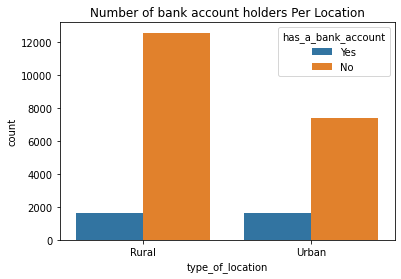

In [159]:
# Number of bank account holders Per Location"
df1 = df['has_a_bank_account'].groupby(by= df.type_of_location).value_counts()
print(df1)
ax = sns.countplot(x="type_of_location",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per Location")

gender_of_respondent  has_a_bank_account
Female                No                    12272
                      Yes                    1477
Male                  No                     7752
                      Yes                    1815
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per gender_of_respondent')

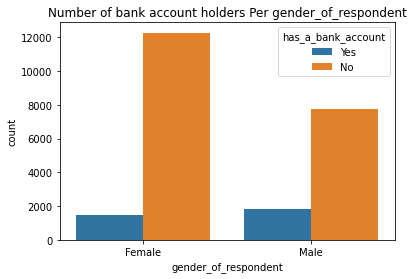

In [166]:
# Number of bank account holders Per gender_of_respondent"
df1 = df['has_a_bank_account'].groupby(by= df.gender_of_respondent).value_counts()
print(df1)
ax = sns.countplot(x="gender_of_respondent",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per gender_of_respondent")

cell_phone_access  has_a_bank_account
No                 No                     5894
                   Yes                     104
Yes                No                    14130
                   Yes                    3188
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per cell_phone_access')

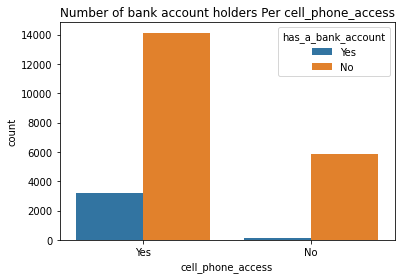

In [167]:
# Number of bank account holders Per cell_phone_access"
df1 = df['has_a_bank_account'].groupby(by= df.cell_phone_access).value_counts()
print(df1)
ax = sns.countplot(x="cell_phone_access",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per cell_phone_access")

marital_status           has_a_bank_account
Divorced/Seperated       No                    1815
                         Yes                    232
Dont know                No                       6
                         Yes                      2
Married/Living together  No                    8825
                         Yes                   1859
Single/Never Married     No                    6942
                         Yes                    958
Widowed                  No                    2436
                         Yes                    241
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per marital_status')

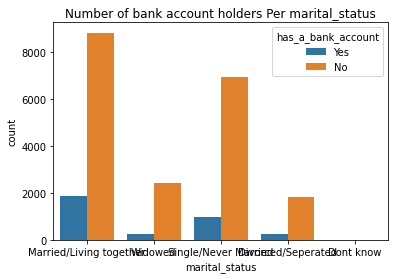

In [168]:
# Number of bank account holders Per marital_status"
df1 = df['has_a_bank_account'].groupby(by= df.marital_status).value_counts()
print(df1)
ax = sns.countplot(x="marital_status",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per marital_status")

level_of_educuation              has_a_bank_account
No formal education              No                     4291
                                 Yes                     176
Other/Dont know/RTA              Yes                       6
                                 No                        2
Primary education                No                    11606
                                 Yes                    1083
Secondary education              No                     3226
                                 Yes                     981
Tertiary education               Yes                     590
                                 No                      554
Vocational/Specialised training  Yes                     456
                                 No                      345
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per level_of_educuation')

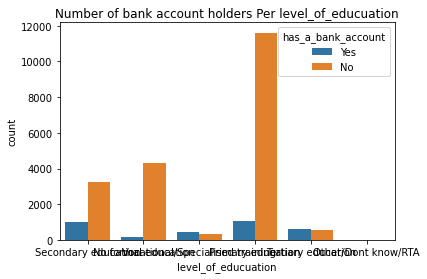

In [169]:
# Number of bank account holders Per level_of_educuation"
df1 = df['has_a_bank_account'].groupby(by= df.level_of_educuation).value_counts()
print(df1)
ax = sns.countplot(x="level_of_educuation",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per level_of_educuation")

type_of_job                   has_a_bank_account
Dont Know/Refuse to answer    No                     111
                              Yes                     14
Farming and Fishing           No                    4788
                              Yes                    634
Formally employed Government  Yes                    299
                              No                      87
Formally employed Private     Yes                    567
                              No                     480
Government Dependent          No                     197
                              Yes                     49
Informally employed           No                    5097
                              Yes                    438
No Income                     No                     602
                              Yes                     13
Other Income                  No                     881
                              Yes                    195
Remittance Dependent          No       

Text(0.5, 1.0, 'Number of bank account holders Per type_of_job')

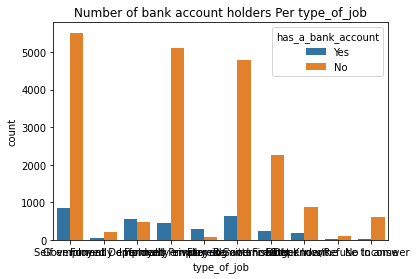

In [170]:
# Number of bank account holders Per type_of_job
df1 = df['has_a_bank_account'].groupby(by= df.type_of_job).value_counts()
print(df1)
ax = sns.countplot(x="type_of_job",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per type_of_job")

country   has_a_bank_account
Kenya     No                    4544
          Yes                   1520
Rwanda    No                    7673
          Yes                    993
Tanzania  No                    5899
          Yes                    598
Uganda    No                    1908
          Yes                    181
Name: has_a_bank_account, dtype: int64


Text(0.5, 1.0, 'Number of bank account holders Per Country')

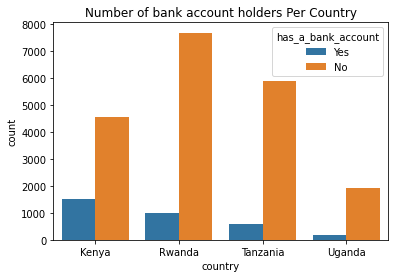

In [175]:
# Number of bank account holders Per type_of_job
df1 = df['has_a_bank_account'].groupby(by= df.country).value_counts()
print(df1)
ax = sns.countplot(x="country",data=df,hue="has_a_bank_account")
plt.title("Number of bank account holders Per Country")

###Analysis Reccomendations

1. The respondent having a cell phone is positive moderately correlated to him/her having a bank account. This might suggest the ease of having bank account and transacting through mobile banking.
2. All other demographic factors are not correlated to one having or not having a bank account. However;


*   Majority of the people in both Urban and rural has no bank account. The bank account holders are relatively the same in both urban and rural setup.
*   Majority of the people with with or without cell phones has no bank account. Majority of those with cell phones have bank accounts
*   Majority of the Female and majority of Males has no bank accounts. The number of males having bank account is slightly higher compared to female
*   Those who are Married/Living together have more bank accounts compared to other marital status
*   Majority of respondents with either Tertiary education or Vocational/Specialised training has bank accounts
*  Majority of respondents who are either Formally employed by Government or Formally employed by Private has bank accounts






###Multivariet Analysis

## 7. Implementing the Solution

From the Analysis above, an ideal individual who is most likely to have or use a bank account can be described as:
* Kenyan
* Having a cell phone
* Is a male
* Married/Living together
* Have either Tertiary education or Vocational/Specialised education
* Is either Formally employed by Government or Formally employed by Private sector.

## 8. Challenging the solution

In [174]:
# Reviewing the Solution 
df.corr()

,year,household_size,respondent_age,has_a_bank_account_trans,cell_phone_access_trans,type_of_location_trans,gender_of_respondent_trans,marital_status_trans,level_of_educuation_trans,type_of_job_trans
year,1.000000,-0.048935,-0.018170,0.110406,-0.061312,-0.204360,0.001833,0.018256,-0.053008,-0.235245
household_size,-0.048935,1.000000,-0.119223,-0.022764,0.098673,0.273889,0.010137,-0.311062,-0.101622,0.202458
respondent_age,-0.018170,-0.119223,1.000000,0.019335,-0.103606,0.048026,0.013087,-0.219939,-0.041989,0.056905
has_a_bank_account_trans,0.110406,-0.022764,0.019335,1.000000,0.209317,-0.088600,0.116241,-0.071195,-0.014995,-0.022508
cell_phone_access_trans,-0.061312,0.098673,-0.103606,0.209317,1.000000,0.084184,0.102148,-0.117840,0.020431,0.084449
type_of_location_trans,-0.204360,0.273889,0.048026,-0.088600,0.084184,1.000000,-0.013276,-0.242400,-0.023741,0.373836
gender_of_respondent_trans,0.001833,0.010137,0.013087,0.116241,0.102148,-0.013276,1.000000,0.015513,0.021942,-0.021597
marital_status_trans,0.018256,-0.311062,-0.219939,-0.071195,-0.117840,-0.242400,0.015513,1.000000,0.045226,-0.229053
level_of_educuation_trans,-0.053008,-0.101622,-0.041989,-0.014995,0.020431,-0.023741,0.021942,0.045226,1.000000,-0.072262
type_of_job_trans,-0.235245,0.202458,0.056905,-0.022508,0.084449,0.373836,-0.021597,-0.229053,-0.072262,1.000000


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Yes